In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from glob import glob
import warnings
warnings.filterwarnings("ignore")
from tqdm import tnrange, tqdm_notebook
from IPython.display import clear_output
from datetime import datetime, timedelta

import ruptures as rpt
from utils.custom_cost import CostNew
from SKAB_data.evaluating import evaluating_change_point

# 1 Data importing

TEP

In [4]:
files = sorted(glob('TEP_data/*_te.dat'))

columns=[]
for i in range(1,42):
    columns.append("XMEAS({})".format(i))
for i in range(1,12):
    columns.append("XMV({})".format(i))
    
# We do not use the first file because it does not contain a defect
test = []
for i, j in enumerate(files[1:], start=1):
    test.append(pd.read_table(j, sep="\s+", names=columns))

In [5]:
test[0].head()

,XMEAS(1),XMEAS(2),XMEAS(3),XMEAS(4),XMEAS(5),XMEAS(6),XMEAS(7),XMEAS(8),XMEAS(9),XMEAS(10),...,XMV(2),XMV(3),XMV(4),XMV(5),XMV(6),XMV(7),XMV(8),XMV(9),XMV(10),XMV(11)
0,0.25025,3657.2,4520.1,9.3965,26.715,42.191,2704.5,74.593,120.42,0.33701,...,53.850,24.670,61.839,22.101,40.078,33.041,48.969,47.459,41.841,18.049
1,0.25135,3662.1,4532.3,9.4020,26.644,42.812,2704.9,75.044,120.39,0.33723,...,53.705,24.562,61.348,22.264,40.050,39.154,49.870,47.403,41.188,18.008
2,0.25045,3681.9,4493.6,9.2395,26.971,42.282,2705.0,75.405,120.42,0.33643,...,54.167,24.659,61.826,22.312,40.147,39.294,44.511,47.265,41.290,18.009
3,0.25056,3667.9,4466.0,9.3602,26.937,42.194,2705.9,75.397,120.41,0.33891,...,54.498,24.648,63.168,22.288,39.845,36.334,46.168,47.410,40.997,17.771
4,0.28659,3693.0,4502.5,9.5652,26.999,42.540,2704.3,74.749,120.39,0.34173,...,54.142,28.430,57.566,22.142,40.806,34.882,45.576,47.424,41.290,19.371


# 2 Testing ensembling functions

<AxesSubplot:>

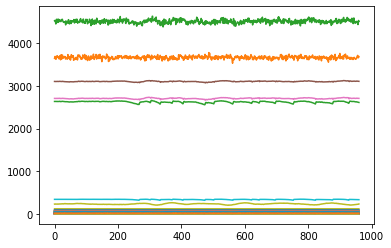

In [82]:
test[19].plot(legend=None)

In [76]:
signal = StandardScaler().fit_transform(test[19].values)

## 2.1 Testing Dynp and DynpEnsembling algorithms

In [77]:
INDEX = pd.to_datetime(
        [datetime(2020,1,1)+timedelta(minutes=m) for m in test[1].index*3]
    )

In [78]:
print('Dynp algorithm:')
algo = rpt.Dynp(custom_cost='l1', jump=2).fit(signal)

my_bkps = algo.predict(n_bkps=1)

true_cp = pd.Series(data=0, index=INDEX)
true_cp.iloc[160] = 1

predicted_cp = pd.Series(data=0, index=INDEX)
predicted_cp[predicted_cp.index[my_bkps[:-1]]] = 1

add = evaluating_change_point(true_cp, predicted_cp, metric='average_delay', numenta_time='288 min')
nab = evaluating_change_point(true_cp, predicted_cp, metric='nab', numenta_time='288 min')

Dynp algorithm:
Average delay nan
A number of missed CPs = 1
Standart  -  0.0
LowFP  -  0.0
LowFN  -  0.0


In [79]:
print('DynpEnsembling algorithm:')
c = CostNew()
algo = rpt.DynpEnsembling(custom_cost=c, jump=2, ensembling=5).fit(signal)

my_bkps = algo.predict(n_bkps=1)

true_cp = pd.Series(data=0, index=INDEX)
true_cp.iloc[160] = 1

predicted_cp = pd.Series(data=0, index=INDEX)
predicted_cp[predicted_cp.index[my_bkps[:-1]]] = 1

add = evaluating_change_point(true_cp, predicted_cp, metric='average_delay', numenta_time='288 min')
nab = evaluating_change_point(true_cp, predicted_cp, metric='nab', numenta_time='288 min')

DynpEnsembling algorithm:
Average delay 0 days 03:42:00
A number of missed CPs = 0
Standart  -  99.54
LowFP  -  99.5
LowFN  -  99.7


## 2.2 Testing Window and WindowEnsembling algorithms

In [115]:
print('Window algorithm:')
algo = rpt.Window(custom_cost='ar', jump=1, width=20).fit(signal)

my_bkps = algo.predict(n_bkps=1)

true_cp = pd.Series(data=0, index=INDEX)
true_cp.iloc[160] = 1

predicted_cp = pd.Series(data=0, index=INDEX)
predicted_cp[predicted_cp.index[my_bkps[:-1]]] = 1

add = evaluating_change_point(true_cp, predicted_cp, metric='average_delay', numenta_time='288 min')
nab = evaluating_change_point(true_cp, predicted_cp, metric='nab', numenta_time='288 min')

Window algorithm:
Average delay nan
A number of missed CPs = 1
Standart  -  0.0
LowFP  -  0.0
LowFN  -  0.0


In [81]:
print('WindowEnsembling algorithm:')
c = CostNew()
algo = rpt.WindowEnsembling(custom_cost=c, jump=1, width=20, ensembling=5).fit(signal)

my_bkps = algo.predict(n_bkps=1)

true_cp = pd.Series(data=0, index=INDEX)
true_cp.iloc[160] = 1

predicted_cp = pd.Series(data=0, index=INDEX)
predicted_cp[predicted_cp.index[my_bkps[:-1]]] = 1

add = evaluating_change_point(true_cp, predicted_cp, metric='average_delay', numenta_time='288 min')
nab = evaluating_change_point(true_cp, predicted_cp, metric='nab', numenta_time='288 min')

WindowEnsembling algorithm:
Average delay nan
A number of missed CPs = 1
Standart  -  0.0
LowFP  -  0.0
LowFN  -  0.0


## 2.3 Testing BinSeg and BinSegEnsembling algorithms

In [83]:
print('BinSeg algorithm:')
algo = rpt.Binseg(custom_cost='l2', jump=1).fit(signal)

my_bkps = algo.predict(n_bkps=1)

true_cp = pd.Series(data=0, index=INDEX)
true_cp.iloc[160] = 1

predicted_cp = pd.Series(data=0, index=INDEX)
predicted_cp[predicted_cp.index[my_bkps[:-1]]] = 1

add = evaluating_change_point(true_cp, predicted_cp, metric='average_delay', numenta_time='288 min')
nab = evaluating_change_point(true_cp, predicted_cp, metric='nab', numenta_time='288 min')

BinSeg algorithm:
Average delay nan
A number of missed CPs = 1
Standart  -  0.0
LowFP  -  0.0
LowFN  -  0.0


In [84]:
print('BinSegEnsembling algorithm:')
c = CostNew()
algo = rpt.BinsegEnsembling(custom_cost=c, jump=1, ensembling=5).fit(signal)

my_bkps = algo.predict(n_bkps=1)

true_cp = pd.Series(data=0, index=INDEX)
true_cp.iloc[160] = 1

predicted_cp = pd.Series(data=0, index=INDEX)
predicted_cp[predicted_cp.index[my_bkps[:-1]]] = 1

add = evaluating_change_point(true_cp, predicted_cp, metric='average_delay', numenta_time='288 min')
nab = evaluating_change_point(true_cp, predicted_cp, metric='nab', numenta_time='288 min')

BinSegEnsembling algorithm:
Average delay 0 days 03:42:00
A number of missed CPs = 0
Standart  -  99.54
LowFP  -  99.5
LowFN  -  99.7


In [98]:
NUM_CPDE = 17

In [89]:
true_cp = pd.Series(data=0, index=INDEX)
true_cp.iloc[160] = 1
true_cp = [true_cp]*len(test)

# 3 Dynp experiment

## 3.1 Individual algorithms

In [92]:
def dynp(cost, data, params, true_cp=true_cp):
    predicted_cp = []
    for dataset in data:
        stsc = StandardScaler()
        signal = stsc.fit_transform(dataset)
        algo = rpt.Dynp(model=cost,
                        params=params,
                        jump=1)
        algo.fit(signal)
        my_bkps = algo.predict(n_bkps=1)
        
        single_predicted_cp = pd.Series(data=0, index=true_cp[0].index)
        single_predicted_cp[single_predicted_cp.index[my_bkps[:-1]]] = 1
        predicted_cp.append(single_predicted_cp)

    nab = evaluating_change_point(true_cp, predicted_cp, metric='nab', numenta_time='288 min')
    return nab

In [93]:
models = (
    {'cost':'ar', 'params':{'order':1}},
    {'cost':'mahalanobis', 'params':{}},
    {'cost':'l1', 'params':{}},
    {'cost':'l2', 'params':{}},
    {'cost':'linear', 'params':{}},
)

In [94]:
%%time

table = []
for model in tqdm_notebook(models):
    results = dynp(data=test, **model)
    clear_output()
    table.append(results)

CPU times: user 4min 21s, sys: 37.3 s, total: 4min 58s
Wall time: 1min 8s


In [95]:
pd.DataFrame(table).style.background_gradient(cmap='Blues')

,Standart,LowFP,LowFN
0,30.150000,28.890000,32.800000
1,36.880000,35.820000,37.290000
2,32.530000,31.980000,32.800000
3,30.300000,29.520000,31.310000
4,4.500000,4.240000,4.590000


## 3.2 Ensemble

In [96]:
def dynpEnsemble(cost, data, num_agg_func, true_cp=true_cp):
    predicted_cp = []
    for dataset in data:
        stsc = StandardScaler()
        signal = stsc.fit_transform(dataset)
        algo = rpt.DynpEnsembling(custom_cost=cost, 
                                  jump=1, 
                                  ensembling=num_agg_func)
        single_predicted_cp = pd.Series(data=0, index=true_cp[0].index)
        try:
            algo.fit(signal)
            my_bkps = algo.predict(n_bkps=1)

            single_predicted_cp[single_predicted_cp.index[my_bkps[:-1]]] = 1
            predicted_cp.append(single_predicted_cp)
        except:
            predicted_cp.append(single_predicted_cp)

    nab = evaluating_change_point(true_cp, predicted_cp, metric='nab', numenta_time='288 min')
    return nab

In [99]:
%%time
cost = CostNew()
table1 = []

for n in tnrange(1, NUM_CPDE, desc='agg functions loop'):
    table1.append(dynpEnsemble(cost=cost, data=test, num_agg_func=n))
    clear_output()

CPU times: user 1h 58min 49s, sys: 23min 13s, total: 2h 22min 3s
Wall time: 24min 47s


In [100]:
pd.DataFrame(table1).style.background_gradient(cmap='Blues')

,Standart,LowFP,LowFN
0,41.810000,41.000000,42.160000
1,25.660000,24.900000,26.630000
2,22.850000,21.820000,24.760000
3,41.810000,41.000000,42.160000
4,34.800000,34.000000,35.900000
5,34.830000,34.030000,35.920000
6,34.730000,33.680000,35.850000
7,30.470000,29.950000,31.420000
8,34.800000,34.000000,35.900000
9,34.830000,34.030000,35.920000


# 4 Win experiment

## 4.1 Individual algorithms

In [101]:
models = (
    {'cost':'ar', 'params':{'order':1}, 'width':10},
    {'cost':'ar', 'params':{'order':1}, 'width':15},
    {'cost':'ar', 'params':{'order':5}, 'width':20},
    {'cost':'mahalanobis', 'params':{}, 'width':10},
    {'cost':'mahalanobis', 'params':{}, 'width':15},
    {'cost':'mahalanobis', 'params':{}, 'width':20},
    {'cost':'l1', 'params':{}, 'width':10},
    {'cost':'l1', 'params':{}, 'width':15},
    {'cost':'l1', 'params':{}, 'width':20},
    {'cost':'l2', 'params':{}, 'width':10},
    {'cost':'l2', 'params':{}, 'width':15},
    {'cost':'l2', 'params':{}, 'width':20},
#     {'cost':'linear', 'params':{}, 'width':10},
#     {'cost':'linear', 'params':{}, 'width':40},
#     {'cost':'linear', 'params':{}, 'width':100}
#     {'model':'rbf', 'params':{}, 'width':40},
#     {'model':'rbf', 'params':{}, 'width':100},
)

In [102]:
def wind(cost, data, params, width, true_cp=true_cp):
    predicted_cp = []
    for dataset in data:
        stsc = StandardScaler()
        signal = stsc.fit_transform(dataset)
        algo = rpt.Window(model=cost, 
                          params=params, 
                          width=width,
                          jump=1)
        algo.fit(signal)
        my_bkps = algo.predict(n_bkps=1)
        
        single_predicted_cp = pd.Series(data=0, index=true_cp[0].index)
        single_predicted_cp[single_predicted_cp.index[my_bkps[:-1]]] = 1
        predicted_cp.append(single_predicted_cp)

    nab = evaluating_change_point(true_cp, predicted_cp, metric='nab', numenta_time='288 min')
    return nab

In [103]:
%%time
table = []
for model in tqdm_notebook(models, desc='agg functions loop'):
    table.append(wind(**model, data=test))
    clear_output()

CPU times: user 1min 39s, sys: 10 s, total: 1min 49s
Wall time: 49.3 s


In [104]:
pd.DataFrame(table).style.background_gradient(cmap='Blues')

,Standart,LowFP,LowFN
0,6.160000,5.110000,7.280000
1,18.580000,18.290000,18.730000
2,13.230000,12.190000,13.590000
3,24.680000,23.110000,25.980000
4,26.460000,25.540000,28.750000
5,27.790000,27.000000,28.050000
6,22.040000,21.390000,22.630000
7,27.580000,26.770000,29.500000
8,20.630000,19.850000,21.690000
9,18.260000,17.470000,18.520000


## 4.2 Ensemble

In [105]:
def windowEnsemble(cost, data, num_agg_func, width, true_cp=true_cp):
    predicted_cp = []
    for dataset in data:
        stsc = StandardScaler()
        signal = stsc.fit_transform(dataset)
        algo = rpt.WindowEnsembling(custom_cost=cost, 
                                    jump=1, 
                                    ensembling=num_agg_func, 
                                    width=width)
        single_predicted_cp = pd.Series(data=0, index=true_cp[0].index)
        try:
            algo.fit(signal)
            my_bkps = algo.predict(n_bkps=1)

            single_predicted_cp[single_predicted_cp.index[my_bkps[:-1]]] = 1
            predicted_cp.append(single_predicted_cp)
        except:
            predicted_cp.append(single_predicted_cp)

    nab = evaluating_change_point(true_cp, predicted_cp, metric='nab', numenta_time='288 min')
    return nab

In [106]:
%%time
cost = CostNew()
table1 = []

for n in tnrange(1, NUM_CPDE, desc='agg functions loop'):
    for w in tqdm_notebook([10, 20, 30], desc='width loop', leave=False):
        table1.append(windowEnsemble(cost=cost, data=test, num_agg_func=n, width=w))
        clear_output()

CPU times: user 24min 3s, sys: 2min 6s, total: 26min 10s
Wall time: 16min 13s


In [107]:
pd.DataFrame(table1).style.background_gradient(cmap='Blues')

,Standart,LowFP,LowFN
0,18.260000,17.480000,18.520000
1,23.550000,23.280000,23.630000
2,23.300000,23.020000,23.470000
3,22.780000,22.200000,23.120000
4,23.280000,22.760000,23.460000
5,23.300000,23.020000,23.470000
6,17.200000,16.310000,17.820000
7,23.820000,23.350000,25.400000
8,18.440000,17.910000,18.640000
9,23.280000,22.750000,23.450000


# 5 BinSeg experiment

## 5.1 Individual algorithms

In [108]:
models = (
    {'cost':'ar', 'params':{'order':1}},
    {'cost':'mahalanobis', 'params':{}},
    {'cost':'l1', 'params':{}},
    {'cost':'l2', 'params':{}},
    {'cost':'linear', 'params':{}},
#     {'model':'rbf', 'params':{}},
)

In [109]:
def binseg(cost, data, params, true_cp=true_cp):
    predicted_cp = []
    for dataset in data:
        stsc = StandardScaler()
        signal = stsc.fit_transform(dataset)
        algo = rpt.Binseg(model=cost, 
                          params=params,
                          jump=1)
        algo.fit(signal)
        my_bkps = algo.predict(n_bkps=1)
        
        single_predicted_cp = pd.Series(data=0, index=true_cp[0].index)
        single_predicted_cp[single_predicted_cp.index[my_bkps[:-1]]] = 1
        predicted_cp.append(single_predicted_cp)

    nab = evaluating_change_point(true_cp, predicted_cp, metric='nab', numenta_time='288 min')
    return nab

In [110]:
table = []
for model in tqdm_notebook(models, desc='agg functions loop'):
    table.append(binseg(**model, data=test))
    clear_output()

In [111]:
pd.DataFrame(table).style.background_gradient(cmap='Blues')

,Standart,LowFP,LowFN
0,30.150000,28.890000,32.800000
1,36.880000,35.820000,37.290000
2,32.530000,31.980000,32.800000
3,30.300000,29.520000,31.310000
4,4.500000,4.240000,4.590000


## 5.2 Ensemble

In [112]:
def binsegEnsemble(cost, data, num_agg_func, true_cp=true_cp):
    predicted_cp = []
    for dataset in data:
        stsc = StandardScaler()
        signal = stsc.fit_transform(dataset)
        algo = rpt.BinsegEnsembling(custom_cost=cost, 
                                    jump=1, 
                                    ensembling=num_agg_func)
        single_predicted_cp = pd.Series(data=0, index=true_cp[0].index)
        try:
            algo.fit(signal)
            my_bkps = algo.predict(n_bkps=1)

            single_predicted_cp[single_predicted_cp.index[my_bkps[:-1]]] = 1
            predicted_cp.append(single_predicted_cp)
        except:
            predicted_cp.append(single_predicted_cp)

    nab = evaluating_change_point(true_cp, predicted_cp, metric='nab', numenta_time='288 min')
    return nab

In [113]:
%%time
cost = CostNew()
table1 = []

for n in tnrange(1, NUM_CPDE, desc='agg functions loop'):
    table1.append(binsegEnsemble(cost, data=test, num_agg_func=n))
    clear_output()

CPU times: user 3h 49min 44s, sys: 1h 16min 26s, total: 5h 6min 10s
Wall time: 55min 27s


In [114]:
pd.DataFrame(table1).style.background_gradient(cmap='Blues')

,Standart,LowFP,LowFN
0,41.810000,41.000000,42.160000
1,25.660000,24.900000,26.630000
2,22.850000,21.820000,24.760000
3,41.810000,41.000000,42.160000
4,34.800000,34.000000,35.900000
5,34.830000,34.030000,35.920000
6,34.800000,34.000000,35.900000
7,30.470000,29.950000,31.420000
8,34.800000,34.000000,35.900000
9,34.830000,34.030000,35.920000
